In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model('/content/model_10.hdf5')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 1.1508 - accuracy: 0.7037 - 5s/epoch - 15ms/step

Test accuracy: 0.7037000060081482


1/1 [==============================] - 0s 67ms/step


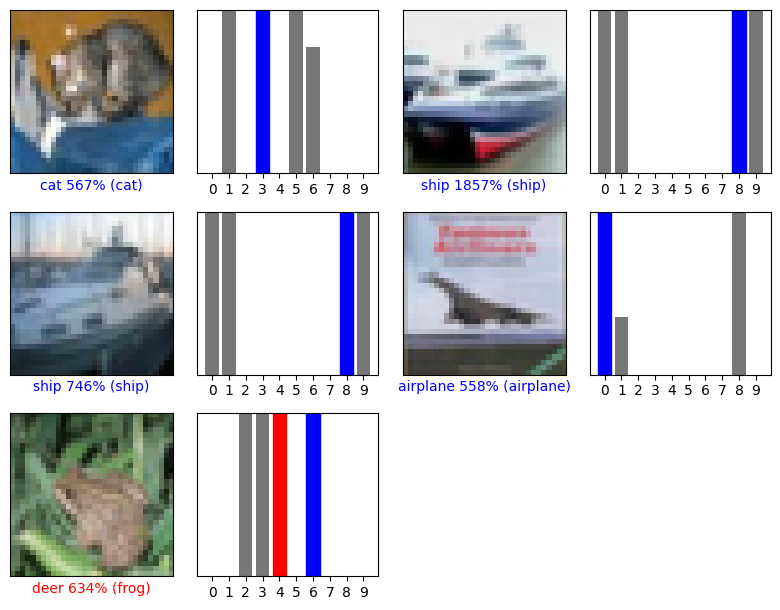

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 테스트 데이터셋에서 이미지 선택 (예시)
N = 5  # 시각화할 이미지의 수
test_images, test_labels = test_images[:N], test_labels[:N]

# 모델을 사용하여 예측
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]  # 수정: true_label[i][0] 사용
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i][0]  # 수정: true_label[i][0] 사용
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# 시각화
num_rows = N
num_cols = 2
num_images = num_rows
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


Processing image: /content/개구리.jpg
1/1 [==============================] - 0s 171ms/step


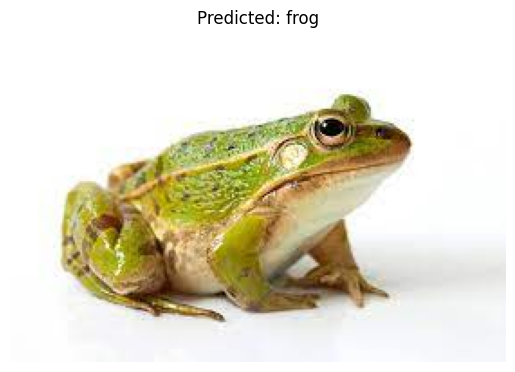

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # 이미지 로드 및 전처리
# def load_and_preprocess_image(img_path):
#     img = load_img(img_path, target_size=(32, 32))  # CIFAR-10 이미지 크기에 맞춤
#     img_tensor = img_to_array(img)  # 이미지를 배열로 변환
#     img_tensor = np.expand_dims(img_tensor, axis=0)  # 이미지에 배치 차원 추가
#     img_tensor /= 255.0  # 픽셀 값을 0과 1 사이로 정규화
#     return img_tensor

# 모델 예측 및 결과 시각화
def predict_and_visualize(img_path, model):
    print("Processing image:", img_path)
    img_tensor = load_and_preprocess_image(img_path)
    predictions = model.predict(img_tensor)
    predicted_class = np.argmax(predictions[0])

    # CIFAR-10 클래스 이름
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # 이미지와 예측 결과 시각화
    plt.imshow(load_img(img_path))
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')  # 축 표시 없애기
    plt.show()

# 모델 로드
model = tf.keras.models.load_model('/content/model_10.hdf5')

# 이미지 경로 설정
img_path = '/content/개구리.jpg'

# 예측 및 시각화
predict_and_visualize(img_path, model)


Processing image: /content/강아지.jpg


1/1 [==============================] - 0s 343ms/step


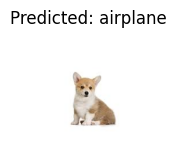

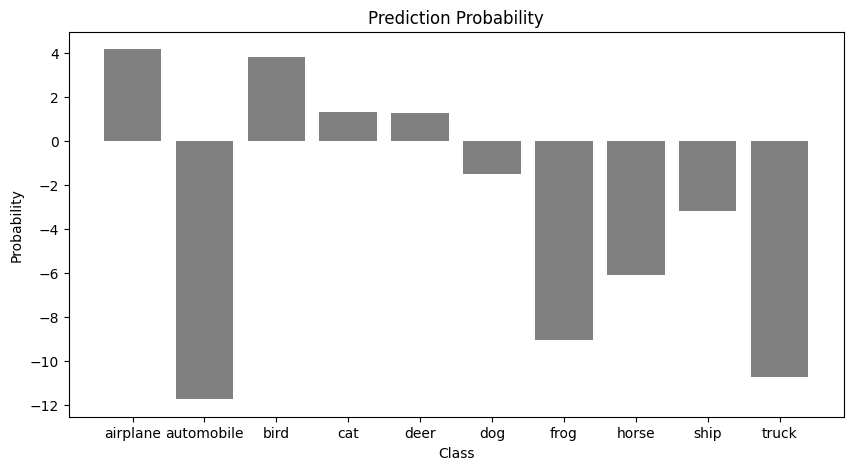

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 이미지 로드 및 전처리
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(32, 32))  # CIFAR-10 이미지 크기에 맞춤
    img_tensor = img_to_array(img)  # 이미지를 배열로 변환
    img_tensor = np.expand_dims(img_tensor, axis=0)  # 이미지에 배치 차원 추가
    img_tensor /= 255.0  # 픽셀 값을 0과 1 사이로 정규화
    return img_tensor

# 예측 확률 시각화
def plot_prediction_probability(predictions, class_names):
    plt.figure(figsize=(10, 5))
    plt.bar(range(10), predictions, color="gray")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(range(10), class_names)
    plt.title("Prediction Probability")
    plt.show()

# 모델 예측 및 결과 시각화
def predict_and_visualize(img_path, model):
    print("Processing image:", img_path)
    img_tensor = load_and_preprocess_image(img_path)
    predictions = model.predict(img_tensor)[0]  # 첫 번째 이미지에 대한 예측 가져오기
    predicted_class = np.argmax(predictions)

    # CIFAR-10 클래스 이름
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # 이미지 시각화
    plt.figure(figsize=(2, 2))
    plt.imshow(load_img(img_path))
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

    # 예측 확률 시각화
    plot_prediction_probability(predictions, class_names)

# 모델 로드
model = tf.keras.models.load_model('/content/model_10.hdf5')

# 이미지 경로 설정
img_path = '/content/강아지.jpg'

# 예측 및 시각화
predict_and_visualize(img_path, model)
